In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the YM dataset (this datased was previously created with pandas to better organize the sample's data)
samples_abs_df = pd.read_csv('YM2_dataset.csv')
samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['freq'] = samples_abs_df['freq'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df = samples_abs_df.set_index('sample')
#samples_abs_df.head(5)
samples_abs_df.columns
#samples_abs_df['mass']

Index(['abs_avg', 'abs_std', 'density', 'granul', 'thickness', 'mass',
       'resflux', 'dens_value', 'freq', 'tl_avg', 'tl_std', 'real_k', 'imag_k',
       'real_z', 'imag_z'],
      dtype='object')

### TL over frequency normalized with sample thickness (for comparison between samples)

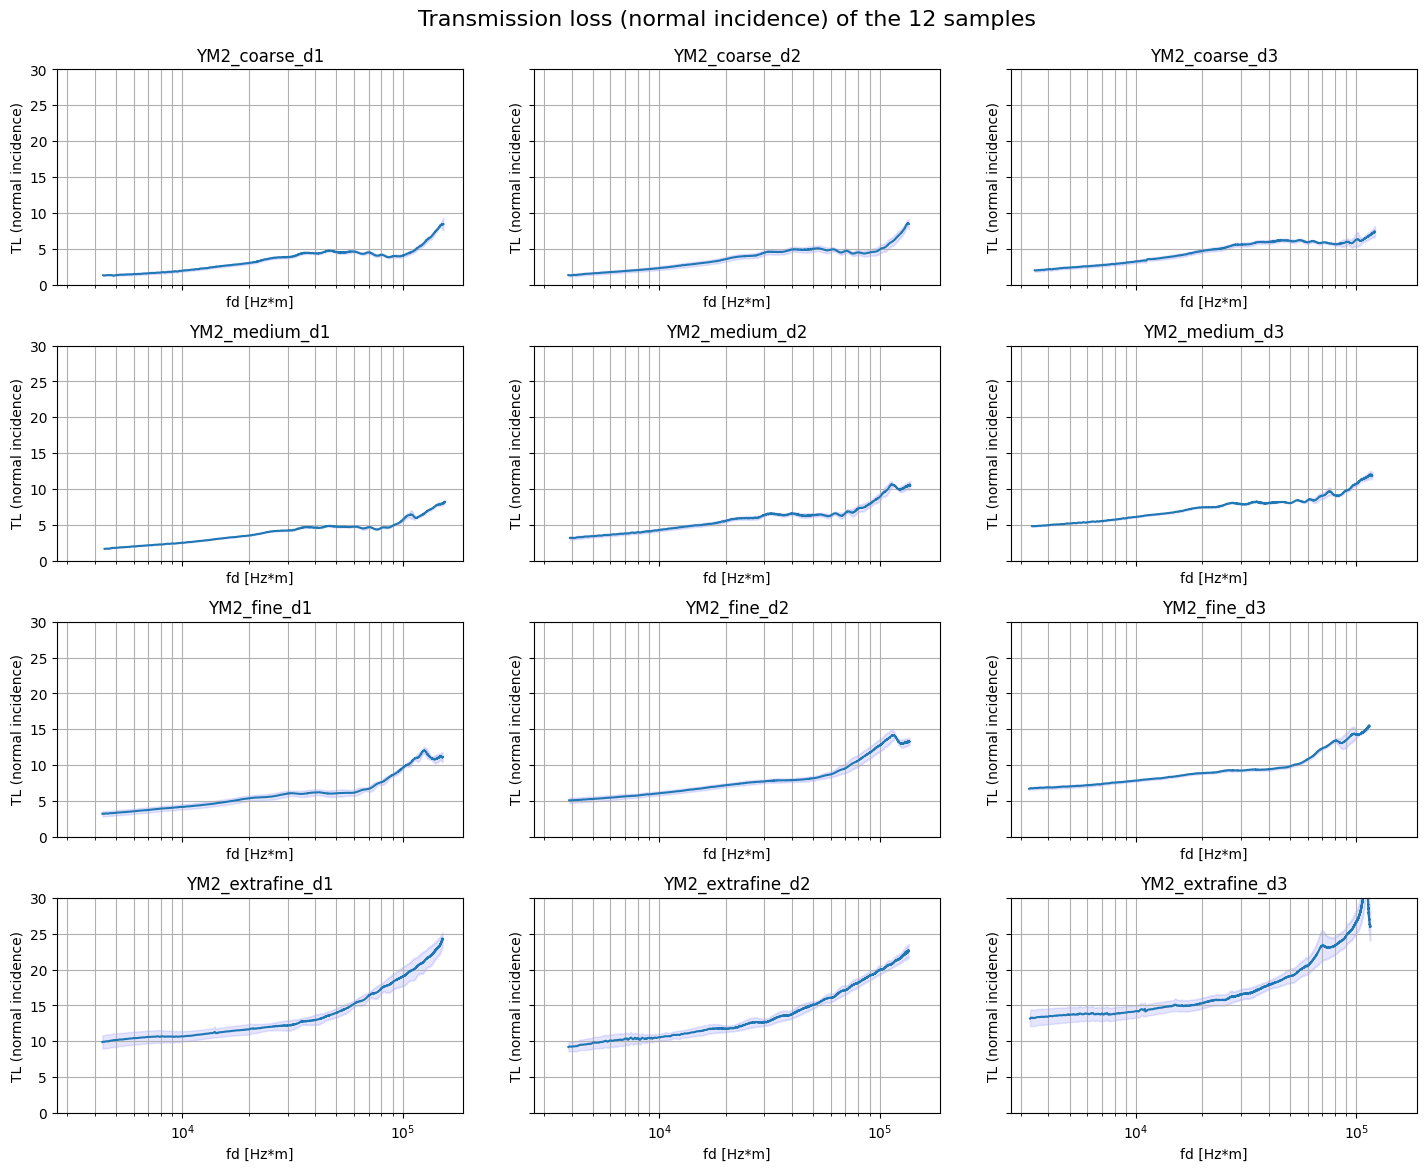

In [42]:
# TL over frequency normalized with sample thickness (for comparison)

ncols = (samples_abs_df['density'].unique()).size   
nrows = (samples_abs_df['granul'].unique()).size  

fig, ax = plt.subplots(nrows, ncols, figsize=(15,12), sharex=True, sharey=True)
ax = ax.flatten()
fig.tight_layout(pad=3.5)

fontsize = 15

for i, axe in enumerate(ax):
    tl_data = np.array(samples_abs_df.iloc[i]['tl_avg'])    #Averages sound absorption coefficient between 3 equal samples
    tl_dev = np.array(samples_abs_df.iloc[i]['tl_std'])     #Standard deviation within 95% confidence
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    #axe.semilogx(freq, tl_data)      #Plot over frequency*thickness
    #axe.fill_between(freq, (tl_data - tl_dev), (tl_data + tl_dev), color='b', alpha=.1)
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(fd, tl_data)      #Plot over frequency*thickness
    axe.fill_between(fd, (tl_data - tl_dev), (tl_data + tl_dev), color='b', alpha=.1)
    axe.set_title(f'{sample_name}')
    #axe.set_xlabel('Frequency [Hz]')
    axe.set_xlabel('fd [Hz*m]')
    axe.set_ylim([0, 30])
    axe.set_ylabel('TL (normal incidence)')
    axe.grid(which='both')
fig.subplots_adjust(top=0.93)
fig.suptitle('Transmission loss (normal incidence) of the 12 samples', fontsize=16)
plt.show()

### TL over frequency

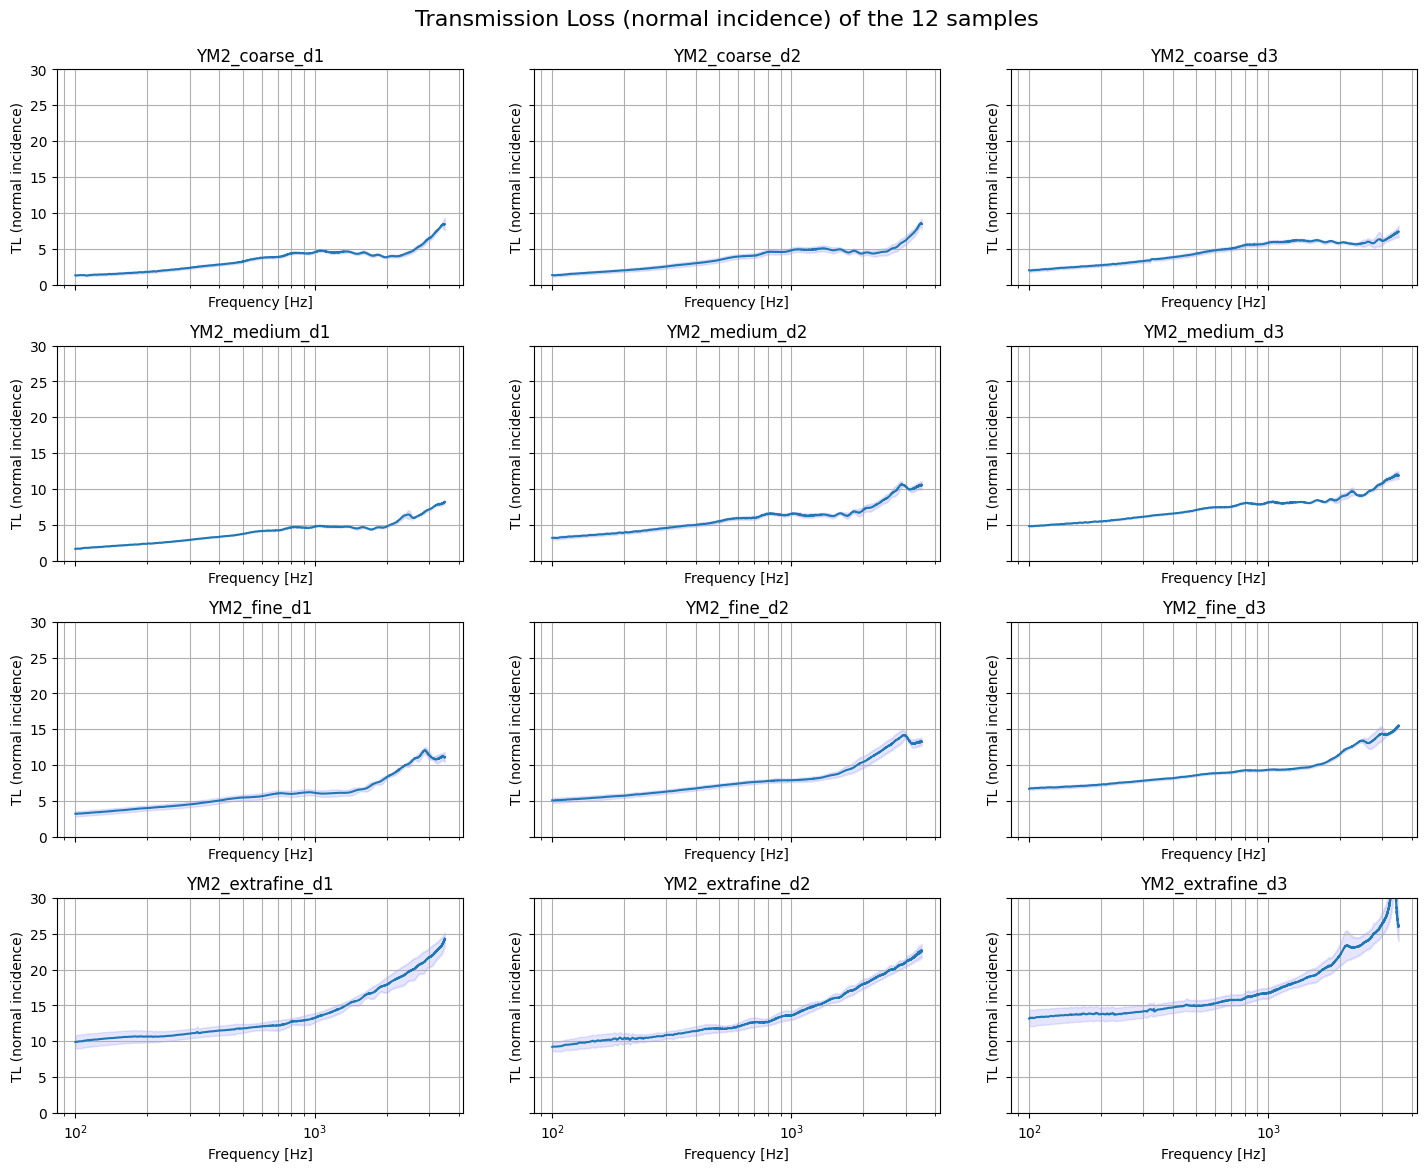

In [43]:
# TL over frequency

ncols = (samples_abs_df['density'].unique()).size   
nrows = (samples_abs_df['granul'].unique()).size  

fig, ax = plt.subplots(nrows, ncols, figsize=(15,12), sharex=True, sharey=True)
ax = ax.flatten()
fig.tight_layout(pad=3.5)


for i, axe in enumerate(ax):
    tl_data = np.array(samples_abs_df.iloc[i]['tl_avg'])    #Averages sound absorption coefficient between 3 equal samples
    tl_dev = np.array(samples_abs_df.iloc[i]['tl_std'])     #Standard deviation within 95% confidence
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    axe.semilogx(freq, tl_data)      #Plot over frequency*thickness
    axe.fill_between(freq, (tl_data - tl_dev), (tl_data + tl_dev), color='b', alpha=.1)
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    #axe.semilogx(fd, tl_data)      #Plot over frequency*thickness
    #axe.fill_between(fd, (tl_data - tl_dev), (tl_data + tl_dev), color='b', alpha=.1)
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    axe.set_ylim([0, 30])
    axe.set_ylabel('TL (normal incidence)')
    axe.grid(which='both')
fig.subplots_adjust(top=0.93)
fig.suptitle('Transmission Loss (normal incidence) of the 12 samples', fontsize=16)
plt.show()

### 2. Comparison betweem different granulometries

- Observations: Increasing TL with density in all cases, except extrafine d2 

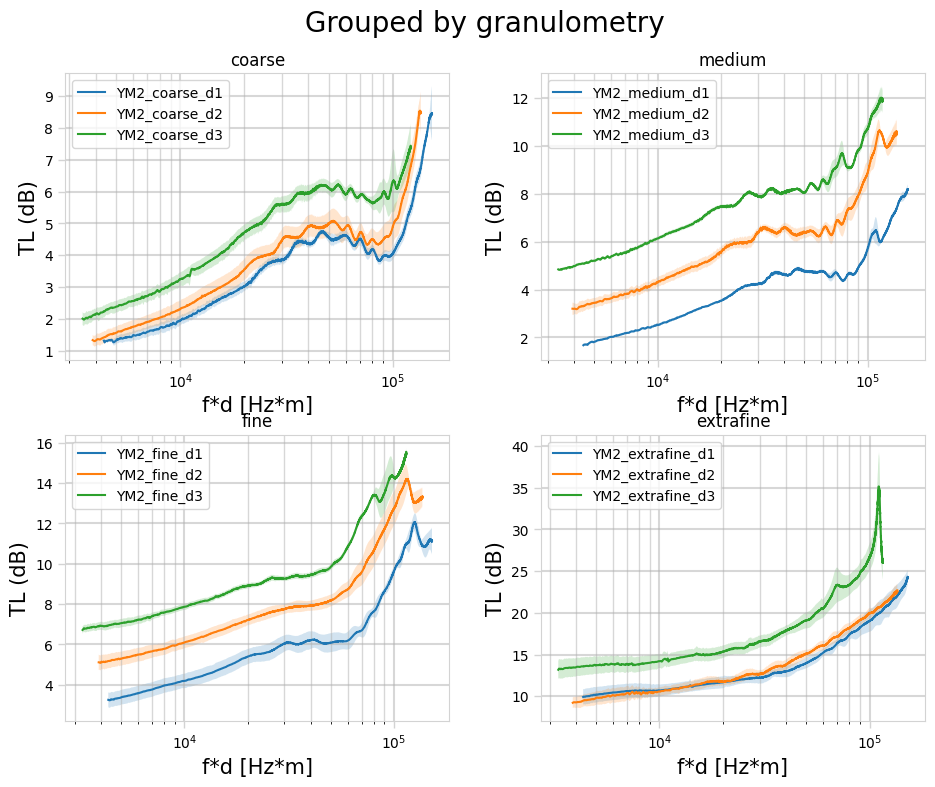

In [44]:
#%% Comparison between granulometry

fig, ax = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout(pad=3.5)
ax = ax.flatten()  #Flatten the array of axes

#Select data grouped by granulometry
group_by = ['coarse','medium','fine', 'extrafine']


for i, g in enumerate(group_by):
    granul_df = samples_abs_df[samples_abs_df['granul']==g]
    
    for j in range(granul_df.index.size):
        label = granul_df.index[j]
        alpha_avg = np.array(granul_df['tl_avg'].iloc[j])
        alpha_std = np.array(granul_df['tl_std'].iloc[j])
        
        fd = [f*granul_df['thickness'].iloc[j] for f in (freq)]
        
        ax[i].semilogx(fd, alpha_avg, label=label)
        ax[i].fill_between(fd, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        #ax[i].semilogx(freq, granul_df['abs_avg'].iloc[j][0], label=label)
        #ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        ax[i].set_title(g)
        ax[i].set_xlabel('f*d [Hz*m]', fontsize=fontsize)
        ax[i].set_ylabel('TL (dB)', fontsize=fontsize)
        #ax[i].set_ylim([0, 1.1])
        ax[i].legend()
        ax[i].grid(linewidth=1, which='minor', linestyle='-', alpha=.5)
        ax[i].grid(linewidth=1.5, which='major', alpha=.5)
        fig.suptitle('Grouped by granulometry', fontsize=20)
        ax[i].tick_params(axis ='both', length=5, width=1, color='lightgray')
        for spine in ax[i].spines.values():
            spine.set_color('lightgrey')  # Change spine color to light grey
fig.subplots_adjust(top=0.9) 
plt.show()

### 3. Comparison betweem different densities

- Observations: 

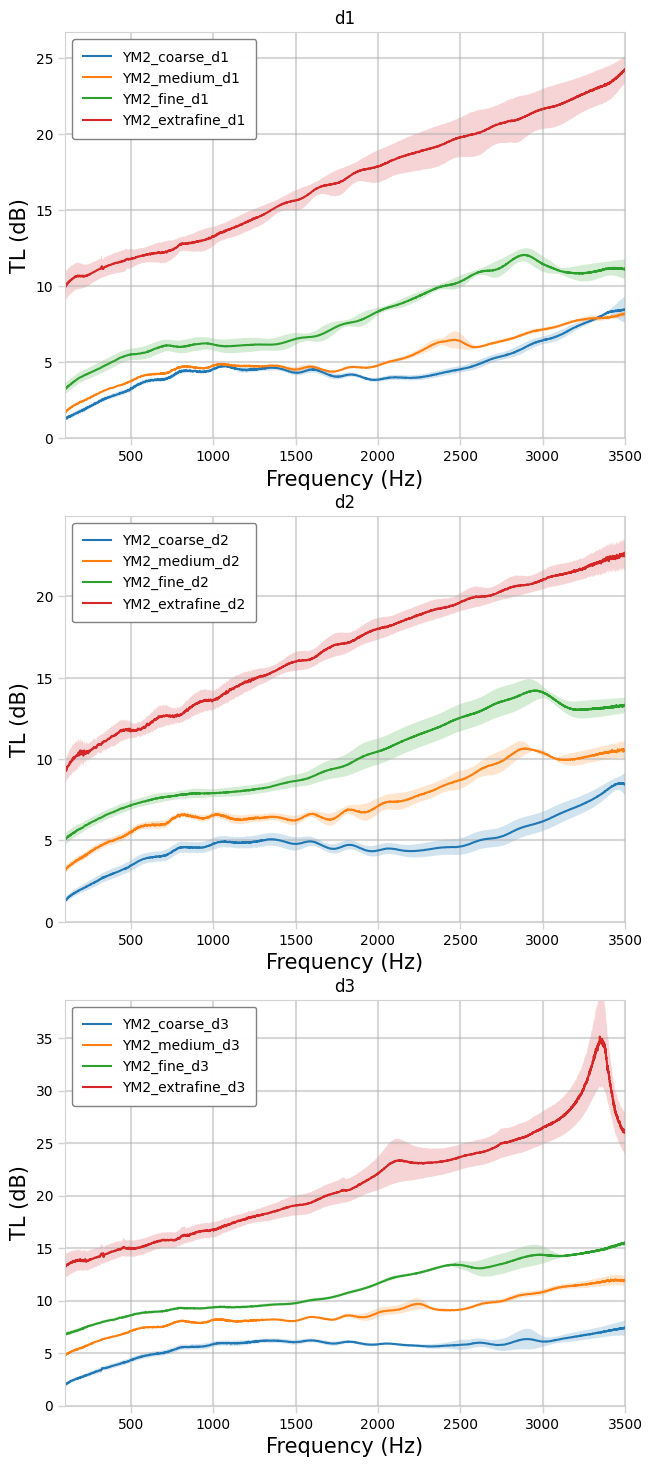

In [47]:
fig, ax = plt.subplots(3, 1, figsize=(7,15))
fig.tight_layout(pad=3.5)

#Select data grouped by density
group_by = ['d1','d2','d3']

for i, g in enumerate(group_by):
    dens_df = samples_abs_df[samples_abs_df['density']==g]
    
    for j in range(dens_df.index.size):
        label = dens_df.index[j]
        alpha_avg = np.array(dens_df['tl_avg'].iloc[j])  
        alpha_std = np.array(dens_df['tl_std'].iloc[j])  
        
        fd = [f*dens_df['thickness'].iloc[j] for f in (freq)]
        
        ax[i].plot(freq, alpha_avg, label=label)
        ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        #ax[i].semilogx(freq, dens_df['abs_avg'].iloc[j][0], label=label)
        #ax[i].fill_between(freq, (alpha_avg - alpha_std), ((alpha_avg + alpha_std)),  alpha=.2)
        
        ax[i].set_title(g)
        ax[i].set_xlabel('Frequency (Hz)', fontsize=fontsize)
        ax[i].set_ylabel('TL (dB)', fontsize=fontsize)
        ax[i].set_ylim([0, np.max(alpha_avg) + 0.1*np.max(alpha_avg)])
        ax[i].set_xlim([100, 3500])
        ax[i].legend(handlelength=2,         # Length of the lines (handles) in legend
                    borderpad=0.8,          # Padding around the legend)
                    framealpha=0.99,         # Slightly transparent
                    facecolor='white',      # White background for legend
                    edgecolor='grey',       # Grey border around legend
                    fontsize=10,      # Title font size
        )
        
        ax[i].grid(linewidth=1, which='minor', linestyle='-', alpha=.5)
        ax[i].grid(linewidth=1.5, which='major', alpha=.5)
        ax[i].tick_params(axis ='both', length=5, width=1, color='lightgray')
        for spine in ax[i].spines.values():
            spine.set_color('lightgrey')  # Change spine color to light grey
        #fig.suptitle('Grouped by density', fontsize=20)
#fig.subplots_adjust(top=0.93)
plt.show()